In [2]:
#get tensorflow main library, this includes keras now
import tensorflow as tf
#from ipynb.fs.full.ClusteringAnomalyDetection import getElbowPointGeneral
import elbow

In [3]:
#import for numpy and vectors = multidimensional arrays = tensors
#vector is a set of numbers {a:3,b:4,c:4}. This resembles what happens in the real world. f(x)= xi variables that may change that are represented by a vector. Speed and direction are basically {s:speed,d:direction} e.g., {s=55mph, d=45degrees}. Multi variable output = vector. A tensor is a group of vectors. E.g., speed and direction for 20,000 cars. This is represented by a 2-d array. We can have more tensors e.g., speed and direction for 20,000 cars at the last 10 minutes. This is a (10,20000,2) array. What about 4-d tensors? Perhaps the last 10 minutes in the 4 other dimensions we know about? Or the last 10 minutes in each of 200 some odd countries in the world if we only had local data. So this can expand nthly and has a hierarchical structure
import numpy as np
import matplotlib.pyplot as plt

(1000,)
(1000,)


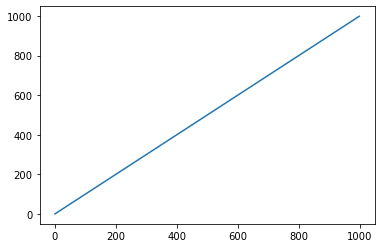

In [4]:
#everything in Tensorflow are numpy arrays let's start with a simple example
#4 rows with 3 columns x,y,z
x = np.arange(0,1000)
y = x
#split array into training and test
xTraining,xTest = np.array_split(x,2)
yTraining,yTest = np.array_split(y,2)
print(x.shape)
print(y.shape)
plt.plot(x,y)


Epoch 1/30
16/16 [==============================] - 1s 44ms/step - loss: 10925.0811 - mse: 10925.0811 - mae: 65.2707 - val_loss: 13408.7783 - val_mse: 13408.7783 - val_mae: 113.7139
Epoch 2/30
16/16 [==============================] - 1s 34ms/step - loss: 521.1212 - mse: 521.1212 - mae: 17.1141 - val_loss: 629.9326 - val_mse: 629.9326 - val_mae: 24.6528
Epoch 3/30
16/16 [==============================] - 1s 36ms/step - loss: 130.9234 - mse: 130.9234 - mae: 8.9380 - val_loss: 780.9684 - val_mse: 780.9684 - val_mae: 27.4346
Epoch 4/30
16/16 [==============================] - 1s 46ms/step - loss: 42.4636 - mse: 42.4636 - mae: 4.7765 - val_loss: 4.3693 - val_mse: 4.3693 - val_mae: 2.0453
Epoch 5/30
16/16 [==============================] - 1s 47ms/step - loss: 5.3506 - mse: 5.3506 - mae: 1.7441 - val_loss: 13.8005 - val_mse: 13.8005 - val_mae: 3.6548
Epoch 6/30
16/16 [==============================] - 1s 50ms/step - loss: 8.8981 - mse: 8.8981 - mae: 2.2246 - val_loss: 52.2223 - val_mse: 52.2

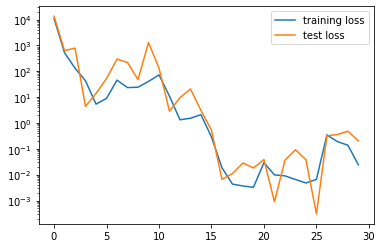

In [5]:
#Wo it's working. OMG. Ok now you need to run grid search cv with all the values to adjust and choose the min mse + you have to cross validate and then run with the best model. You can do it. Just be patient. 
#create a sequential model, allows you to keep adding layers and keeps track of the order
model = tf.keras.Sequential()
#create 2 layers, initial guess
l = 5
#create n nodes, initial guess
n = len(x)
for i in range(l):
    #print(f"layer {i} created")
    #a dense layer has connections between it and the prior layer all connected
    #relu vs sigmoid, relu are rectified linear units, they allow for simple linear activation, more on this later
    model.add(tf.keras.layers.Dense(n,activation='relu'))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dense(8, activation='relu'))

#add a final output layer with 0 or 1 and use of sigmoid since it is between 0-1
#for multi-class outputs we can use softmax which is 
model.add(tf.keras.layers.Dense(1, activation ='linear'))

#compile the model using MSE as our error to minimize, this is the backpropogation section and ADAM is a more 
#efficient version of Gradient Descent which uses different learning rates for finding the minimums 
#model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

#model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

#fit and use max computations of 300 (pratical contstraint)
#history = model.fit(x,y, epochs=30,verbose=True)
history = model.fit(xTraining,yTraining, epochs=30,verbose=True, validation_data=(xTest, yTest))

loss_history = history.history["loss"]
print(history.history.keys)

plt.yscale("log")
plt.plot(loss_history,label="training loss")
plt.plot(history.history['val_loss'],label="test loss")
plt.legend()
for i in range(len(loss_history)):
    print("Epoch %i :"%i, loss_history[i])

#print model summary 
print(f"model summary = {model.summary()}")

#x=np.array([[0,0],[0,1],[1,0],[1,1]])
#print(x)
#print(y)
print(model.predict([1,2,3,4,5,10]))


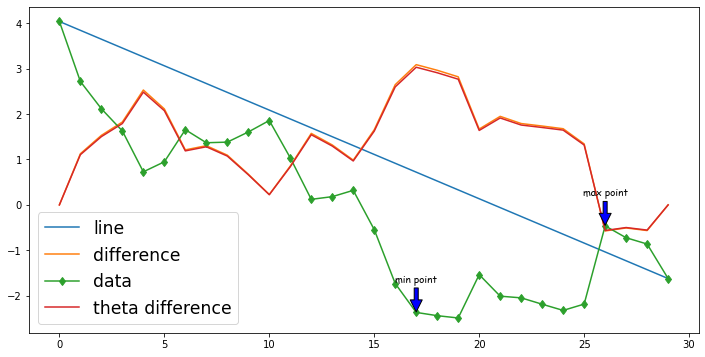

(17.0,
 26.0,
            0      line          diff  best     thetaDiff
 0   4.038425  4.038425  0.000000e+00   NaN  0.000000e+00
 1   2.716939  3.843277  1.126338e+00   NaN  1.105484e+00
 2   2.117017  3.648128  1.531111e+00   NaN  1.502764e+00
 3   1.628017  3.452980  1.824964e+00   NaN  1.791176e+00
 4   0.728406  3.257832  2.529426e+00   NaN  2.482595e+00
 5   0.949297  3.062684  2.113387e+00   NaN  2.074259e+00
 6   1.655860  2.867536  1.211676e+00   NaN  1.189243e+00
 7   1.368586  2.672387  1.303802e+00   NaN  1.279663e+00
 8   1.382051  2.477239  1.095188e+00   NaN  1.074912e+00
 9   1.605447  2.282091  6.766439e-01   NaN  6.641163e-01
 10  1.858045  2.086943  2.288982e-01   NaN  2.246603e-01
 11  1.035855  1.891795  8.559396e-01   NaN  8.400925e-01
 12  0.122454  1.696647  1.574193e+00   NaN  1.545048e+00
 13  0.181708  1.501498  1.319790e+00   NaN  1.295355e+00
 14  0.320645  1.306350  9.857050e-01   NaN  9.674554e-01
 15 -0.543548  1.111202  1.654750e+00   NaN  1.624114e+00


In [7]:
import pandas as pd
import numpy as np
#take logorithm to avoid small numbers being ignored
log_history = np.log10(loss_history)
df = pd.DataFrame(data=log_history)
elbow.getElbowPointGeneral(df)